In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from fitter import Fitter, get_common_distributions, get_distributions
from itertools import islice
import matplotlib.pyplot as plt

In [3]:
url_20 = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2020-01.csv.gz"
url_21 = "/bigdata/jelicicna/output_datasets/distances_table_nextbike_2021-01.csv.gz"
df_20 = pd.read_csv(url_20, sep=';', low_memory=False)
df_21 = pd.read_csv(url_21, sep=';', low_memory=False)

In [4]:
pd.set_option('display.max_columns()', None)

In [5]:
matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

In [6]:
df_20.head(2)

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone
0,50.932058,6.988541,50.936326,6.986125,2020-01-01 02:40:01,2020-01-01 02:46:02,6.0,504.0,26503191,26523894,160.0,NaN,BIKE 22739,2620,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin
1,50.936326,6.986125,50.932037,6.988254,2020-01-01 06:25:02,2020-01-01 06:30:03,5.0,500.0,26523894,26528020,219.0,NaN,BIKE 22739,2613,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin


In [7]:
df_21.head(2)

,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,address,name,available_bikes,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone
0,50.943332,6.981505,50.943501,6.981660,2021-01-02 23:57:02,2021-01-03 00:01:01,4.0,22.0,40297977,40645704,2877.0,NaN,BIKE 21596,814,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin
1,50.943501,6.981660,50.943417,6.981606,2021-01-04 10:11:02,2021-01-05 10:18:02,1447.0,10.0,40645704,40668729,2050.0,NaN,BIKE 21596,798,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin


## Quantitative analysis

In [8]:
df_20.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,number,place_type,special_racks,terminal_type
count,64091.000000,64091.000000,64091.000000,64091.000000,64091.000000,6.409100e+04,6.409100e+04,6.409100e+04,64091.000000,64091.000000,64091.0,64091.000000,64091.0,64091.0,64091.0,64091.0,64091.0,64091.0,0.0
mean,50.941037,6.948651,50.940973,6.948554,124.311947,1.688738e+03,2.700648e+07,2.702456e+07,497.676928,2566.334556,0.0,0.998580,0.0,0.0,0.0,0.0,12.0,0.0,NaN
std,0.023502,0.341632,0.023010,0.341123,1043.369053,3.264697e+04,5.565468e+05,4.620322e+05,1301.308187,43.279893,0.0,0.037655,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,48.304453,-78.952175,48.304453,-78.952175,1.000000,0.000000e+00,3.600450e+05,3.600450e+05,0.000000,2438.000000,0.0,0.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
25%,50.927367,6.925052,50.927352,6.925060,8.000000,5.240000e+02,2.676937e+07,2.679152e+07,26.000000,2534.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
50%,50.939025,6.947049,50.938998,6.947007,15.000000,1.113000e+03,2.702456e+07,2.704123e+07,113.000000,2570.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
75%,50.954213,6.970656,50.954141,6.970608,29.000000,2.110000e+03,2.727097e+07,2.728045e+07,463.000000,2604.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
max,52.089698,11.660785,51.222905,8.634770,35710.000000,5.830284e+06,2.745502e+07,2.745523e+07,40819.000000,2673.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN


In [9]:
df_21.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,number,place_type,special_racks,terminal_type
count,29555.000000,29555.000000,29555.000000,29555.000000,29555.000000,2.955500e+04,2.955500e+04,2.955500e+04,29555.000000,29555.000000,29555.0,29555.0,29555.0,29555.0,29555.0,29555.0,29555.00000,29555.0,0.0
mean,50.937710,6.945679,50.937731,6.945693,150.867332,2.787833e+03,4.090482e+07,4.092256e+07,1013.222264,764.596481,0.0,1.0,0.0,0.0,0.0,0.0,12.01191,0.0,NaN
std,0.432883,0.498736,0.432932,0.500044,1096.452159,8.540785e+04,7.106149e+05,7.448718e+05,2343.969128,23.790128,0.0,0.0,0.0,0.0,0.0,0.0,0.30845,0.0,NaN
min,-22.528276,-77.384705,-22.528276,-77.384705,1.000000,0.000000e+00,3.839360e+05,3.678240e+05,0.000000,673.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.00000,0.0,NaN
25%,50.926197,6.922760,50.926160,6.922863,9.000000,5.010000e+02,4.075773e+07,4.077682e+07,45.000000,749.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.00000,0.0,NaN
50%,50.938685,6.944758,50.938700,6.944975,17.000000,1.230000e+03,4.091198e+07,4.092944e+07,266.000000,765.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.00000,0.0,NaN
75%,50.954608,6.966602,50.954668,6.966809,33.000000,2.391000e+03,4.107716e+07,4.108809e+07,1045.000000,780.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.00000,0.0,NaN
max,52.582051,17.066560,52.582051,17.066560,43082.000000,8.233548e+06,4.126349e+07,4.126400e+07,44149.000000,833.000000,0.0,1.0,0.0,0.0,0.0,0.0,20.00000,0.0,NaN


In [10]:
df_20 = df_20[df_20.ride_time != 1]
df_21 = df_21[df_21.ride_time != 1]

In [11]:
df_20.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,number,place_type,special_racks,terminal_type
count,58948.000000,58948.000000,58948.000000,58948.000000,58948.000000,5.894800e+04,5.894800e+04,5.894800e+04,58948.000000,58948.000000,58948.0,58948.000000,58948.0,58948.0,58948.0,58948.0,58948.0,58948.0,0.0
mean,50.941077,6.948584,50.940992,6.948489,135.070469,1.820388e+03,2.700629e+07,2.702364e+07,535.164467,2566.388325,0.0,0.998677,0.0,0.0,0.0,0.0,12.0,0.0,NaN
std,0.023463,0.356088,0.023227,0.355559,1087.270086,3.403491e+04,5.003911e+05,4.537868e+05,1341.006799,43.265258,0.0,0.036352,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,48.304453,-78.952175,48.304453,-78.952175,2.000000,0.000000e+00,3.600450e+05,3.786530e+05,0.000000,2438.000000,0.0,0.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
25%,50.927352,6.924975,50.927327,6.925018,10.000000,6.500000e+02,2.676684e+07,2.678179e+07,39.000000,2534.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
50%,50.939043,6.947002,50.939016,6.946971,17.000000,1.229000e+03,2.702234e+07,2.703849e+07,136.000000,2571.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
75%,50.954302,6.971076,50.954222,6.971056,31.000000,2.226000e+03,2.726996e+07,2.727999e+07,513.000000,2604.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN
max,52.089698,11.660785,51.204806,8.634770,35710.000000,5.830284e+06,2.745492e+07,2.745523e+07,40819.000000,2673.000000,0.0,1.000000,0.0,0.0,0.0,0.0,12.0,0.0,NaN


In [12]:
df_21.describe()

,lat_begin,lng_begin,lat_end,lng_end,ride_time,distance,uid_begin,uid_end,standing_before_ride,available_bikes,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,number,place_type,special_racks,terminal_type
count,26926.000000,26926.000000,26926.000000,26926.000000,26926.000000,2.692600e+04,2.692600e+04,2.692600e+04,26926.000000,26926.000000,26926.0,26926.0,26926.0,26926.0,26926.0,26926.0,26926.000000,26926.0,0.0
mean,50.937451,6.945029,50.937323,6.945631,165.500074,2.976605e+03,4.090417e+07,4.092637e+07,1087.163522,765.035022,0.0,1.0,0.0,0.0,0.0,0.0,12.011290,0.0,NaN
std,0.452513,0.520284,0.453533,0.523762,1147.687067,8.935894e+04,6.116811e+05,5.753605e+05,2402.219421,23.623990,0.0,0.0,0.0,0.0,0.0,0.0,0.300329,0.0,NaN
min,-22.528276,-77.384705,-22.528276,-77.384705,2.000000,0.000000e+00,3.839360e+05,3.678240e+05,0.000000,675.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,0.0,NaN
25%,50.926054,6.922858,50.925993,6.922944,11.000000,6.530000e+02,4.075475e+07,4.077527e+07,76.000000,749.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,0.0,NaN
50%,50.938595,6.944871,50.938605,6.945083,19.000000,1.382000e+03,4.090893e+07,4.092762e+07,334.000000,766.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,0.0,NaN
75%,50.954523,6.966425,50.954600,6.966659,36.000000,2.517000e+03,4.107007e+07,4.108565e+07,1118.000000,780.000000,0.0,1.0,0.0,0.0,0.0,0.0,12.000000,0.0,NaN
max,52.504592,17.066560,52.582051,17.066560,43082.000000,8.233548e+06,4.126349e+07,4.126400e+07,44149.000000,833.000000,0.0,1.0,0.0,0.0,0.0,0.0,20.000000,0.0,NaN


### Visual analysis

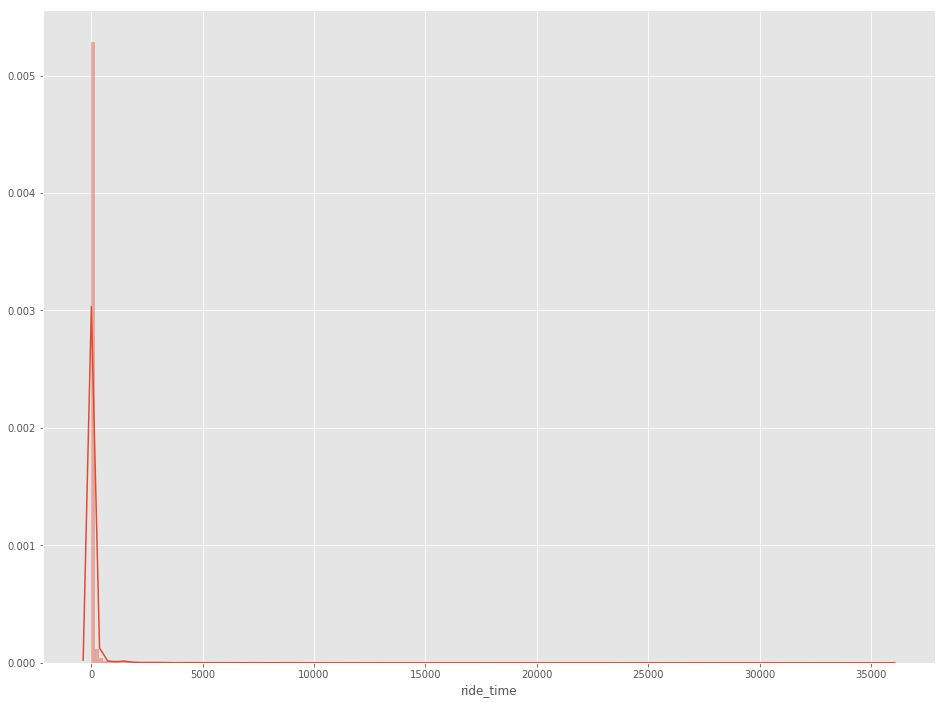

In [13]:
#sns.set_style('white')
#sns.set_context('paper', font_scale= 1.5)

sns.distplot(df_20['ride_time'], bins = 200)

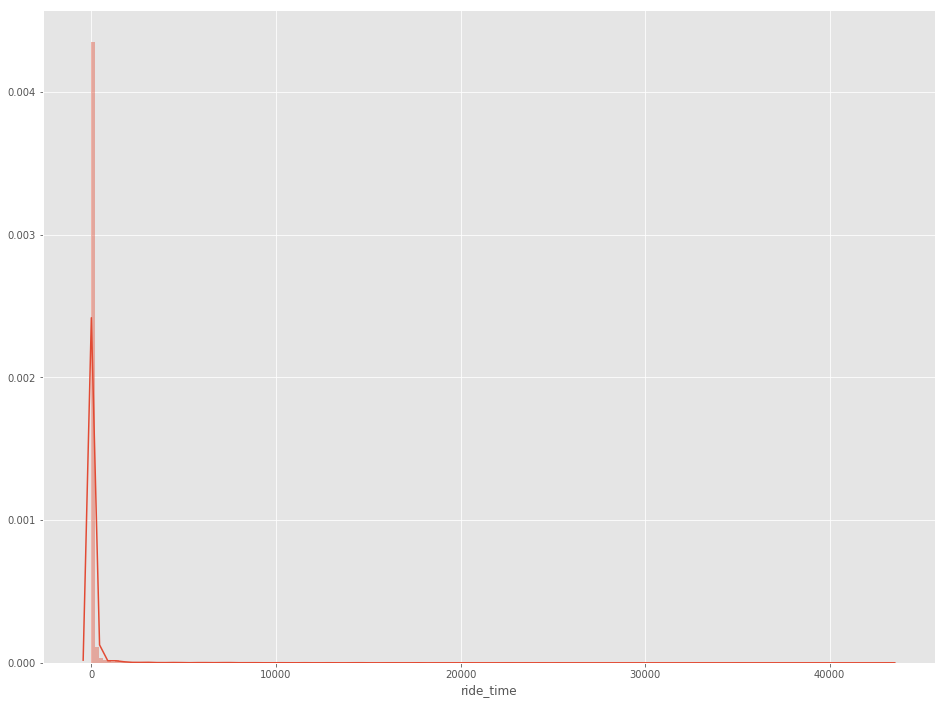

In [14]:
sns.distplot(df_21['ride_time'], bins = 200)

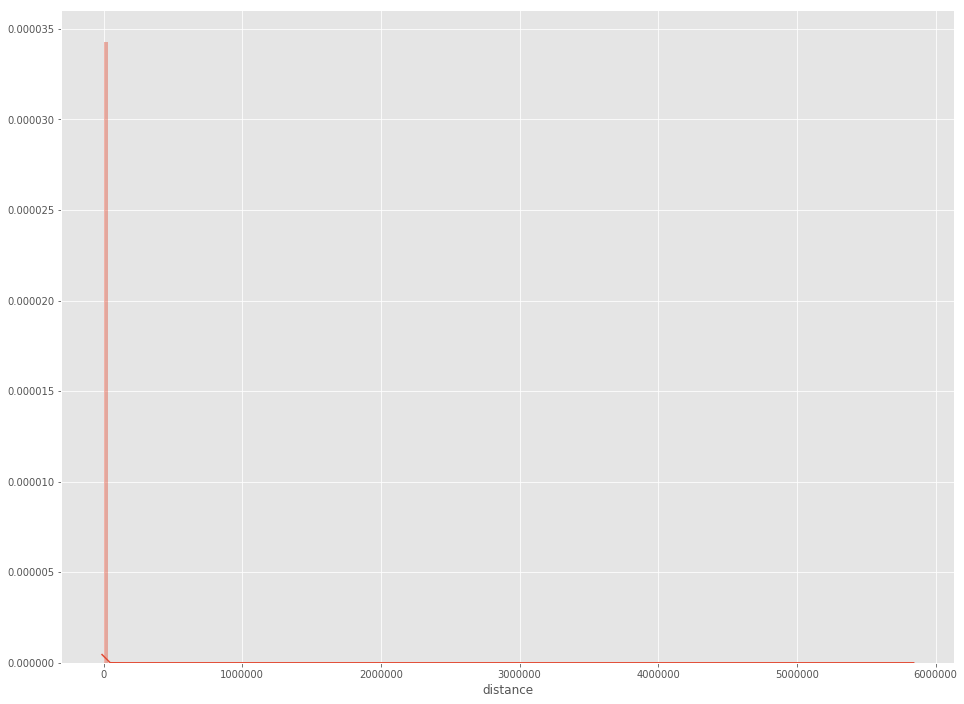

In [15]:
sns.distplot(df_20['distance'], bins = 200)

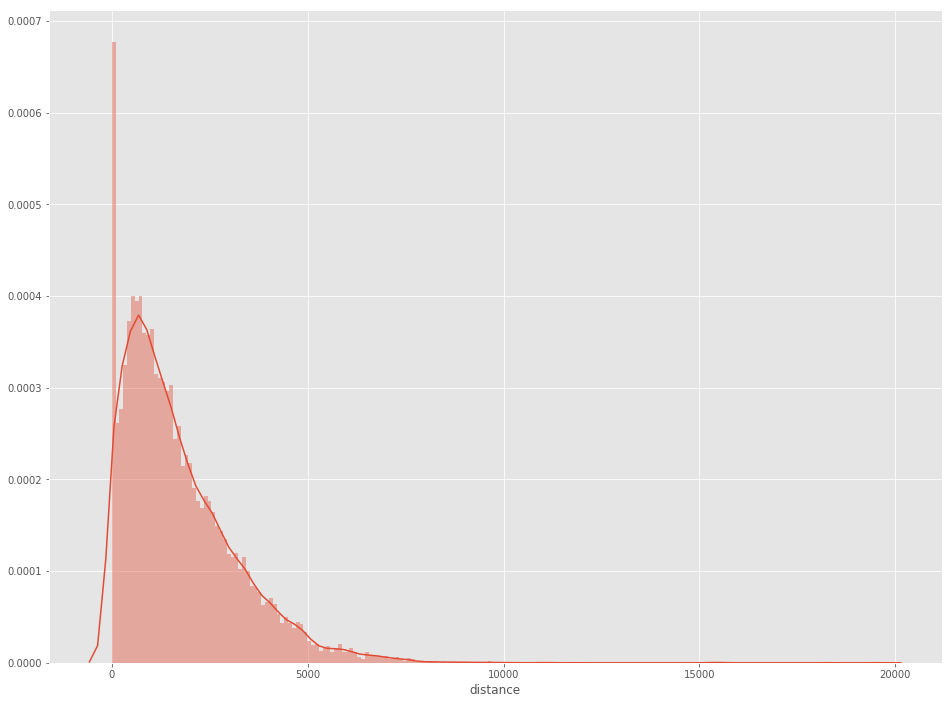

In [15]:
sns.distplot(df_21['distance'], bins = 200)

In [16]:
distances_per_ride_time_20= df_20.groupby('ride_time')['distance'].apply(list)
distances_per_ride_time_21= df_21.groupby('ride_time')['distance'].apply(list) 

In [17]:
distances_per_ride_time_20 = distances_per_ride_time_20.to_dict()
distances_per_ride_time_21 = distances_per_ride_time_21.to_dict()

In [34]:
duration_per_ride_time_20 = {}
for x in distances_per_ride_time_20.keys(): duration_per_ride_time_20[x] = sum(distances_per_ride_time_20[x])

In [40]:
duration_per_ride_time_21 = {}
for x in distances_per_ride_time_21.keys(): duration_per_ride_time_21[x] = sum(distances_per_ride_time_21[x])

<BarContainer object of 961 artists>

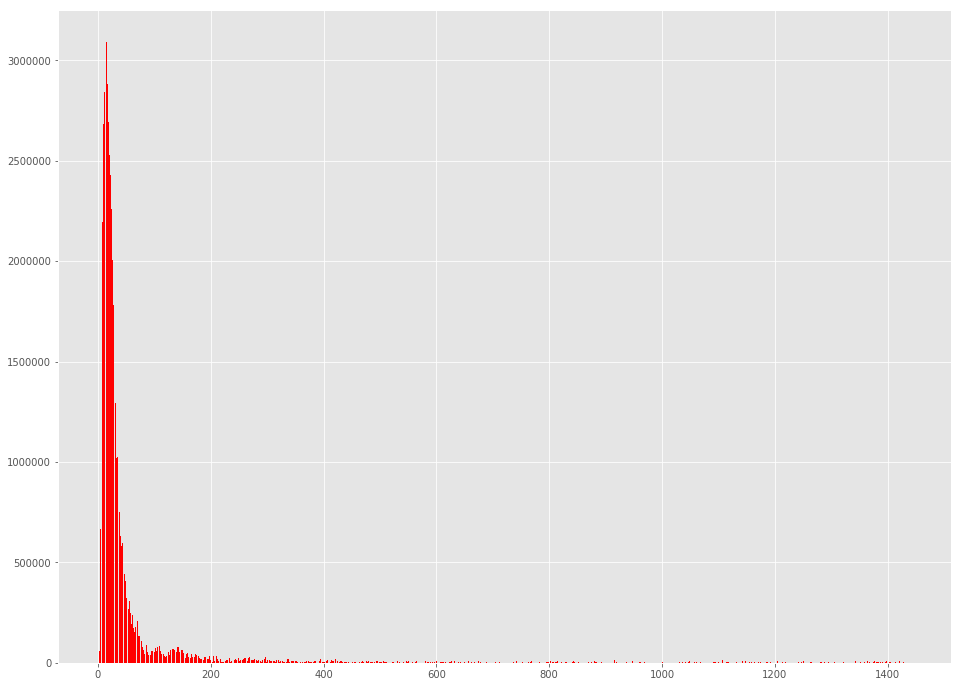

In [39]:
plt.bar(duration_per_ride_time_20.keys(), duration_per_ride_time_20.values(), color='r')

<BarContainer object of 752 artists>

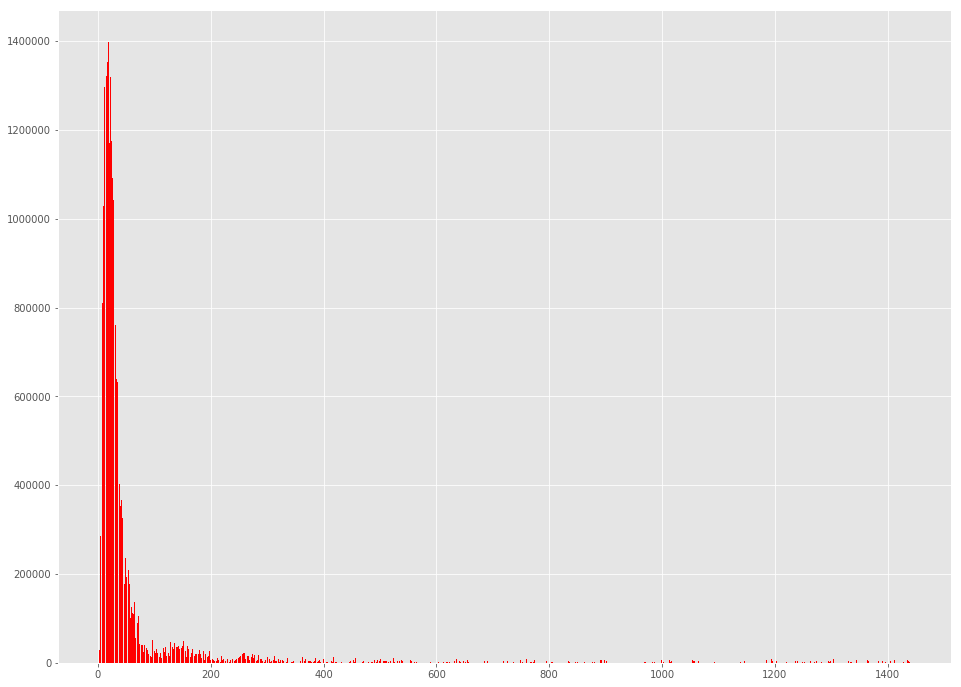

In [41]:
plt.bar(duration_per_ride_time_21.keys(), duration_per_ride_time_21.values(), color='r')

In [43]:
count_per_ride_time_20 = {}
for x in distances_per_ride_time_20.keys(): count_per_ride_time_20[x] = len(distances_per_ride_time_20[x])

In [44]:
count_per_ride_time_21 = {}
for x in distances_per_ride_time_21.keys(): count_per_ride_time_21[x] = len(distances_per_ride_time_21[x])

<BarContainer object of 961 artists>

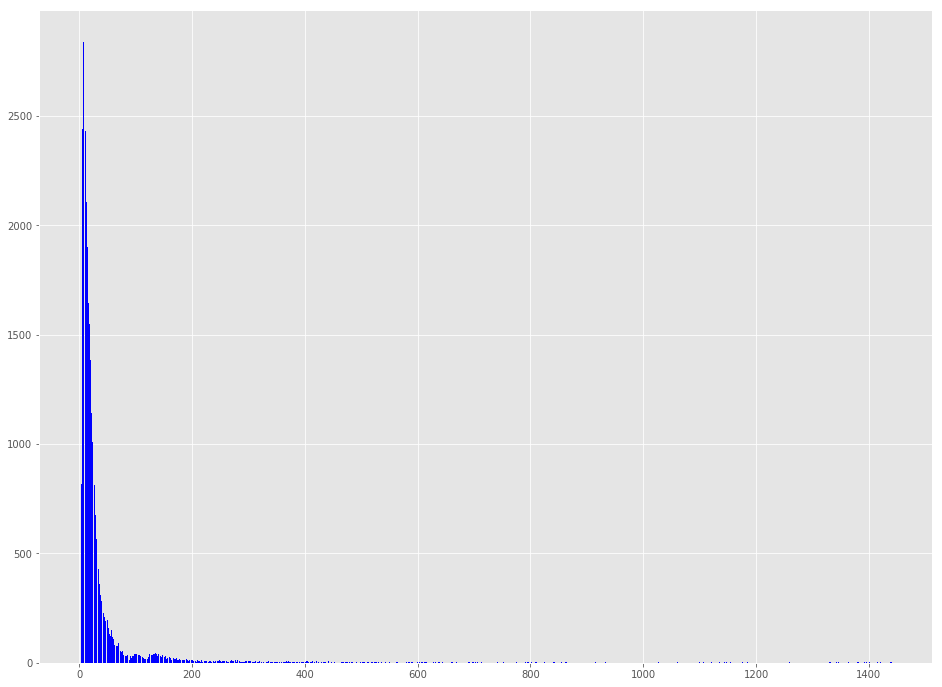

In [45]:
plt.bar(count_per_ride_time_20.keys(), count_per_ride_time_20.values(), color='b')

<BarContainer object of 752 artists>

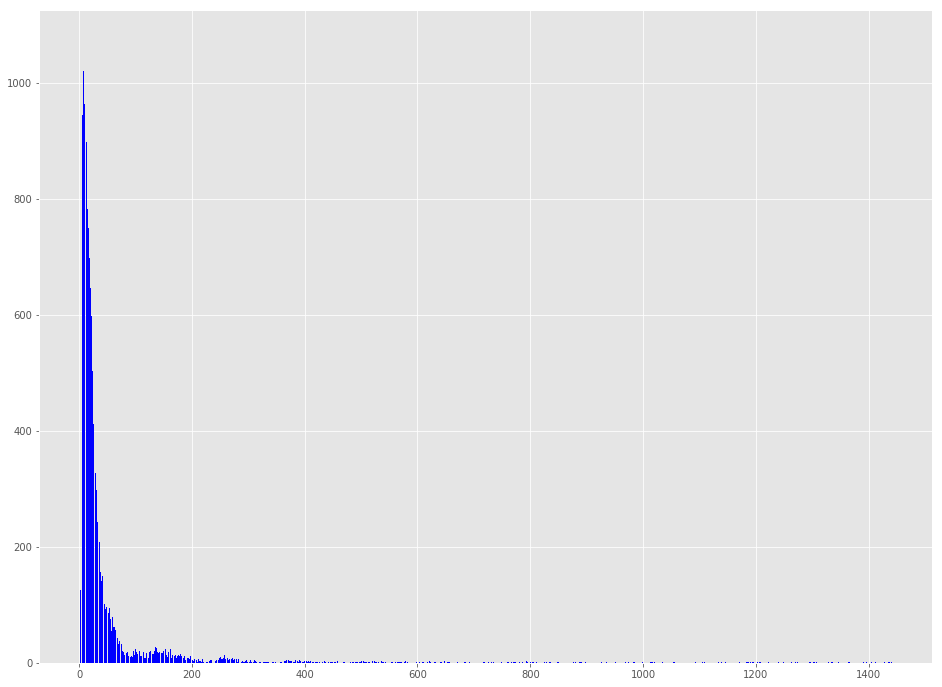

In [46]:
plt.bar(count_per_ride_time_21.keys(), count_per_ride_time_21.values(), color='b')